# 2. More How-To Recipes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hotstepper as hs
from hotstepper.utilities import get_epoch_start,date_to_float_bulk
from hotstepper import Bases, Basis
import hotstepper.samples as samples

## Quick Plot

Let's change it up and use the page view sample dataset to play with, as the step keys for this data are direct float values as opposed to datetime, which is our usual flavour ;-)

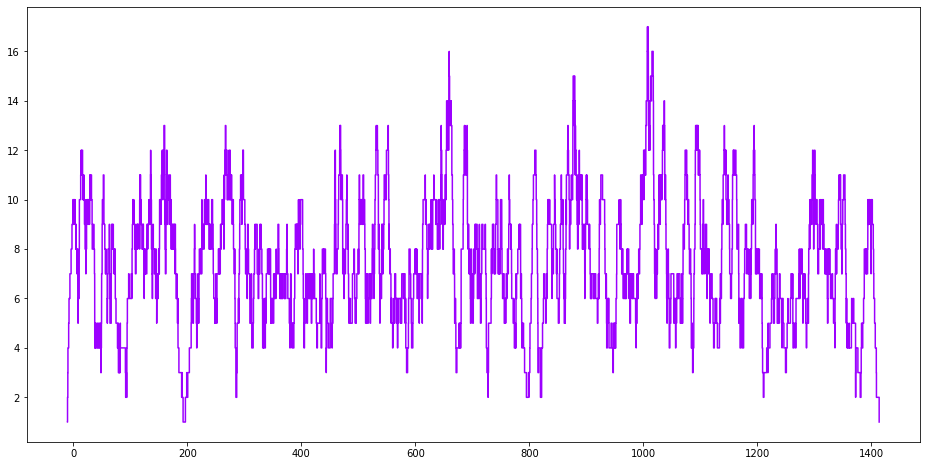

In [2]:
page_views = samples.page_view_sample()
page_views.plot();

## Quick Smooth Plot

Let's have some fun with the chart first and put a few more exploratory items on it

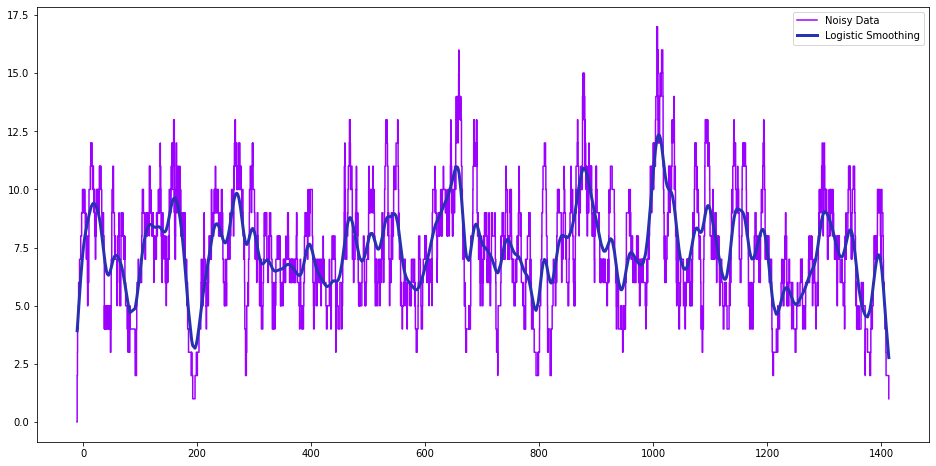

In [3]:
ax = page_views.plot(label='Noisy Data')
page_views.smooth_plot(ax=ax, linewidth=3, label='Logistic Smoothing')
ax.legend();

## Smooth Plot with Multiple Basis (kernel functions)

Let's add some different basis and see what happens. With HotStepper, we can use a basis in a number of ways. We can apply the basis temporarily to just get a smooth plot, or we can permanently change the basis. Here are a few examples of what that means.

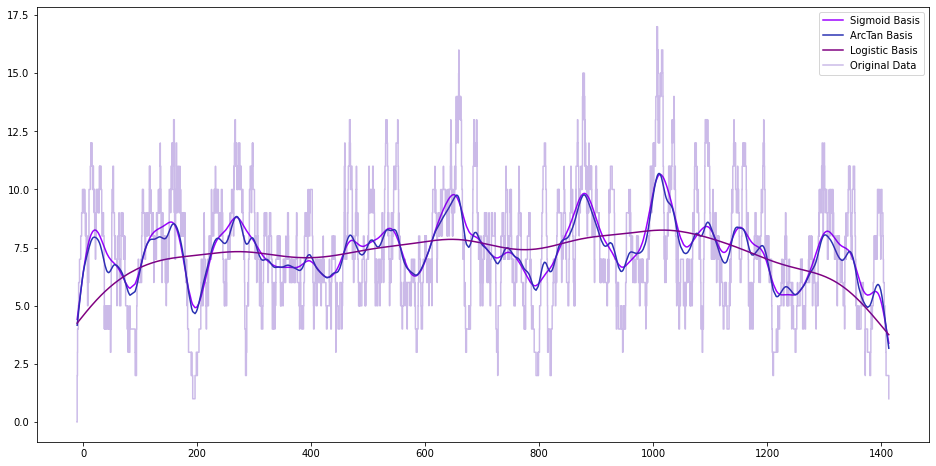

In [4]:
#let's make a copy so we can preserve the original dataset

#define some new basis to use
sigmoid = Basis(Bases.sigmoid,param=10)
atan = Basis(Bases.arctan)
logistic = Basis(Bases.logistic,param=100)

#we'll do smooth plotting first
ax = page_views.smooth_plot(smooth_basis=sigmoid, label='Sigmoid Basis')
page_views.smooth_plot(ax=ax, smooth_basis=atan, label='ArcTan Basis')
page_views.smooth_plot(ax=ax, smooth_basis=logistic, label='Logistic Basis')
#we plot the original data last to show that we haven't permenantly changed the basis, only the smoothing plotting basis

page_views.plot(ax=ax,label='Original Data',alpha=0.3)

ax.legend();

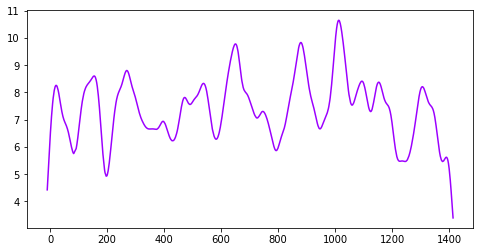

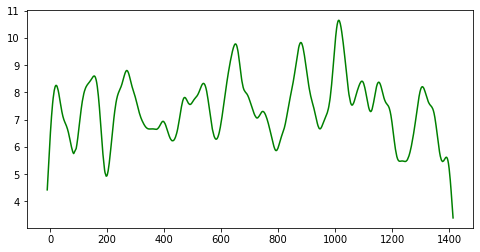

In [5]:
page_views_copy = page_views.copy()

page_views_copy.rebase(sigmoid)

#if we just use plot, we still get the original data, as plot preserves the step basis, we need to specifically ask for the smooth plot, we can always ask two ways
page_views_copy.plot(method='smooth',figsize=(8,4))
page_views_copy.smooth_plot(figsize=(8,4),color='g');


## New Data Quick Plot (again)

Ok great, plots, more plots! What else. Well, let's substract the smooth data from the original noisy data, so we get the variation around the smooth "trend" as a new steps objects.


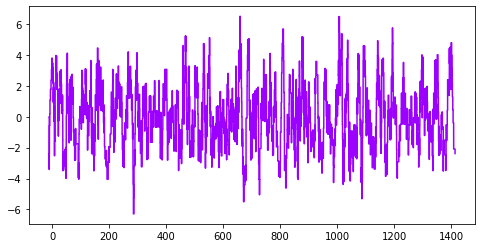

In [6]:
#this is why we created a copy
page_views_delta = page_views - page_views_copy
page_views_delta.plot(figsize=(8,4));


## Quick Summary Plot(s)

Interesting, as expected, we get a zero centered steps function with alot of noise. We can get a quick understanding of this using the standard process or calling either summary or describe; let's go with the swiss army knife summary.

,Metric,Value
0,Count,1897.00
1,Mean,7.44
2,Median,8.00
3,Mode,7.00
4,Std,2.55
5,Var,6.49
6,Min,1.00
7,25%,6.00
8,75%,10.00
9,Max,17.00


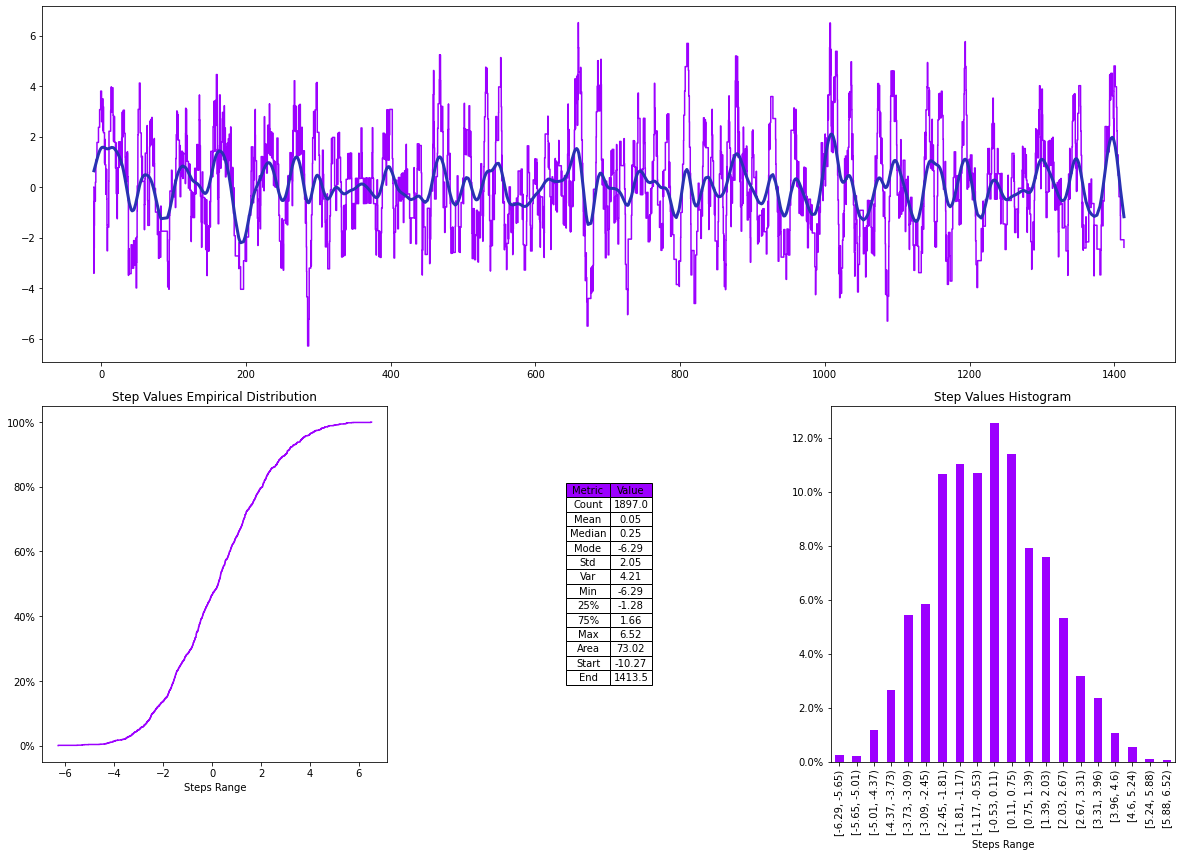

In [7]:
page_views_delta.summary();

#comapre with stats from the original data
page_views.describe()

What if we did the same thing with a different basis?

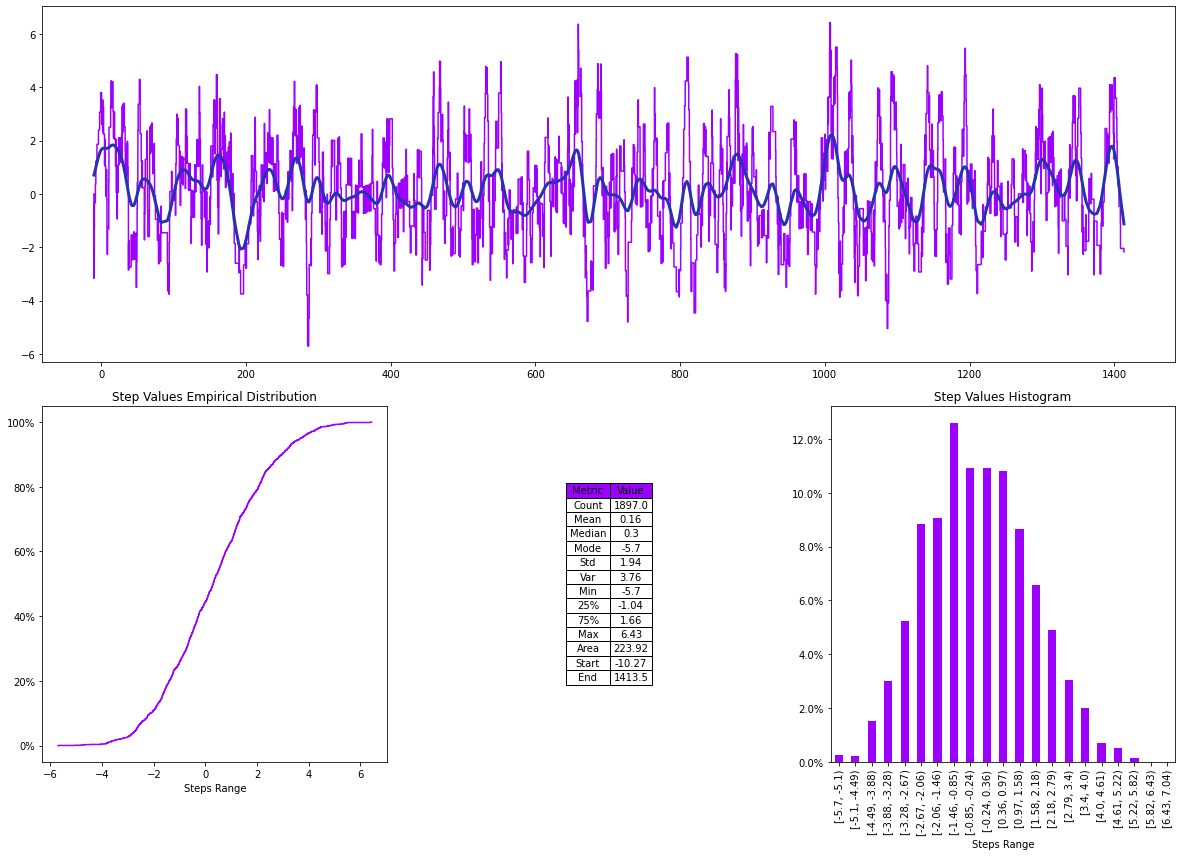

In [8]:
page_views_copy.rebase(atan)
page_views_delta = page_views - page_views_copy
page_views_delta.summary();

Interesting, we can see from the Area value that there is more variation around this smooth trend line using the ArcTan basis than with the Signmoid basis. Lastly, we'll look at the Logistic basis, I mean why not at this point, it's 3 lines of code that does all the heavy lifting.

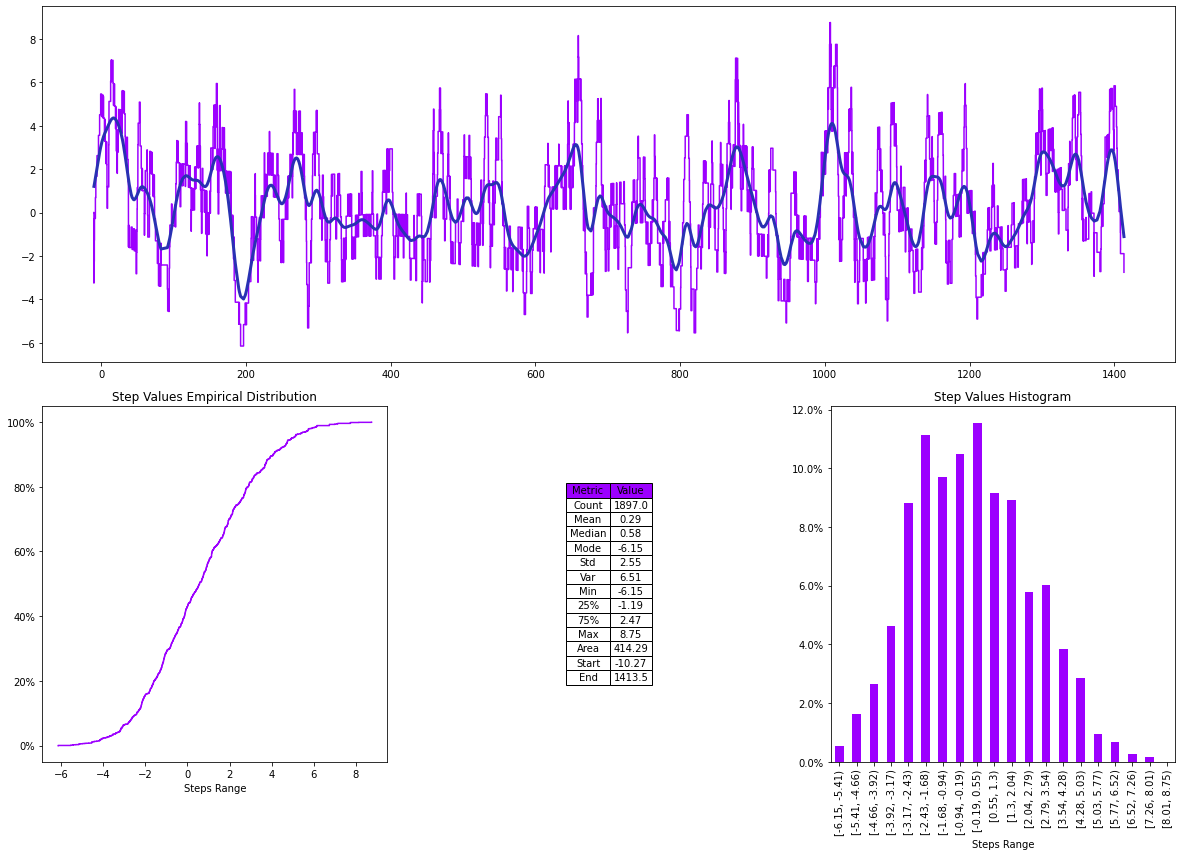

In [9]:
page_views_copy.rebase(logistic)
page_views_delta = page_views - page_views_copy
page_views_delta.summary();

Let's leave the smoothing parameter at default and see what happens, as the original logistic basis we specified, we provided a value for the smoothing parameter, maybe HotStepper can do better?


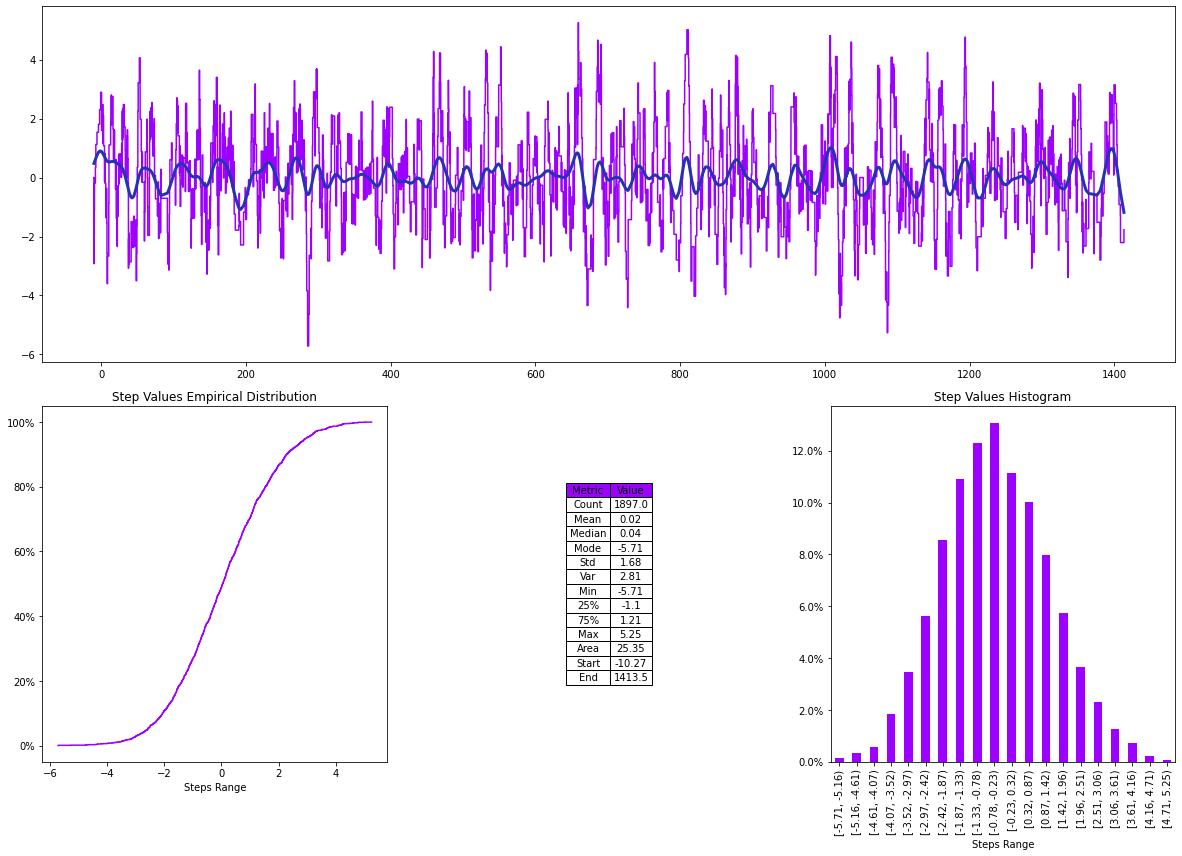

In [10]:
logistic_default = Basis(Bases.logistic)
page_views_copy.rebase(logistic_default)
page_views_delta = page_views - page_views_copy
page_views_delta.summary();

What? You expected something else? Of course the default works better, the mean is closer to zero and the area is even less than the other tests. Ultimately, this is because internally, HotStepper performs a few calculations to determine a nice smoothing factor for each dataset, therefore the default parameter for each basis is "usually" the best balance between smoothing and feature capture.

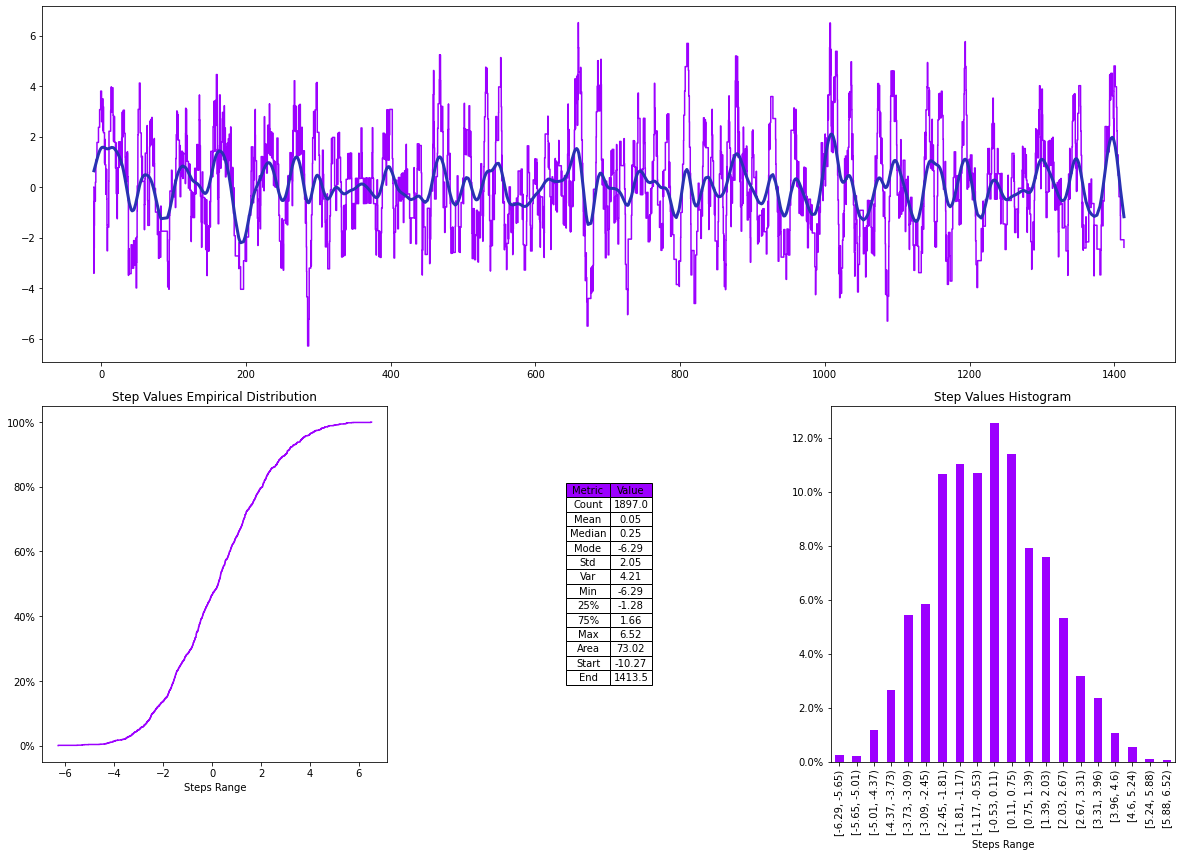

In [11]:
sigmoid_default = Basis(Bases.sigmoid)
page_views_copy.rebase(sigmoid_default)
page_views_delta = page_views - page_views_copy
page_views_delta.summary();

## Multiple Basis Plots

Based on this last analysis, looks like we need to review the differences together, so let's just plot them all together.

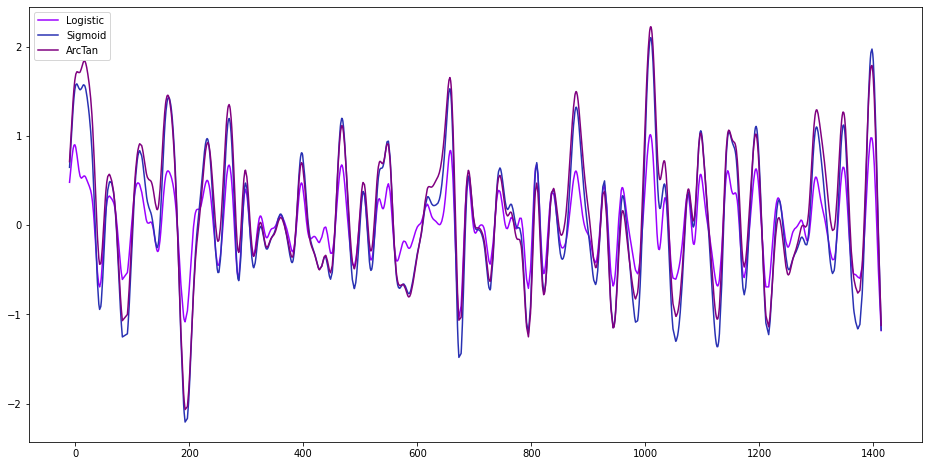

In [12]:
logistic_default = Basis(Bases.logistic)
page_views_copy.rebase(logistic_default)
page_views_delta = page_views - page_views_copy

ax = page_views_delta.plot(method='smooth',label='Logistic')

sigmoid_default = Basis(Bases.sigmoid)
page_views_copy.rebase(sigmoid_default)
page_views_delta = page_views - page_views_copy

ax = page_views_delta.plot(ax=ax,method='smooth',label='Sigmoid')

atan_default = Basis(Bases.arctan)
page_views_copy.rebase(atan_default)
page_views_delta = page_views - page_views_copy

page_views_delta.plot(ax=ax,method='smooth',label='ArcTan')
ax.legend();